In [18]:
import numpy as np
import pandas as pd

In [19]:
from google.colab import files
uploaded = files.upload()

In [20]:
df = pd.read_csv("Epileptic Seizure Recognition.csv")  # or whatever the uploaded file name is
df.head(10)


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [21]:
X = df.drop(columns=['y'])   # or 'class'
y = df['y']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (9200, 179) (9200,)
Testing set: (2300, 179) (2300,)


In [24]:
import matplotlib.pyplot as plt

In [25]:
# Example: convert multi-class to binary (e.g., 1 = seizure, others = non-seizure)
df['y'] = df['y'].apply(lambda x: 1 if x == 1 else 0)


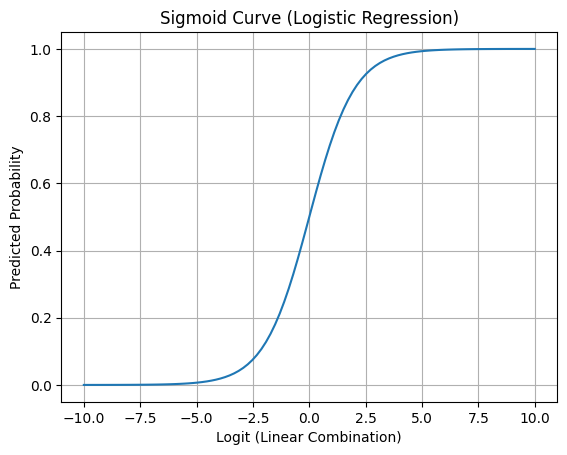

In [ ]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))  # Sigmoid function

plt.plot(x, y)
plt.title("Sigmoid Curve (Logistic Regression)")
plt.xlabel("Logit (Linear Combination)")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()

In [ ]:
X_train.dtypes[X_train.dtypes == 'object']


,0
Unnamed,object


In [ ]:
X_train['Unnamed'].unique()


array(['X5.V1.617', 'X21.V1.893', 'X5.V1.90', ..., 'X22.V1.413',
       'X11.V1.917', 'X4.V1.663'], dtype=object)

In [ ]:
X_train = X_train.drop(columns=['Unnamed'])
X_test = X_test.drop(columns=['Unnamed'])


In [ ]:
print(X_train.dtypes.value_counts())


int64    178
Name: count, dtype: int64


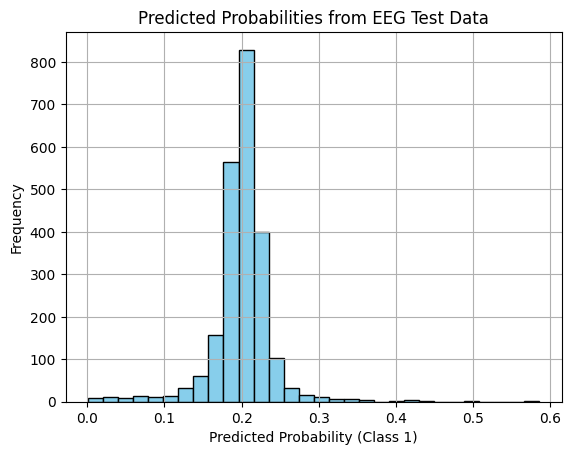

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Scale your EEG features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Get predicted probabilities for Class 1
probs = model.predict_proba(X_test_scaled)[:, 1]  # this is 1D


plt.hist(probs, bins=30, color='skyblue', edgecolor='k')
plt.title("Predicted Probabilities from EEG Test Data")
plt.xlabel("Predicted Probability (Class 1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


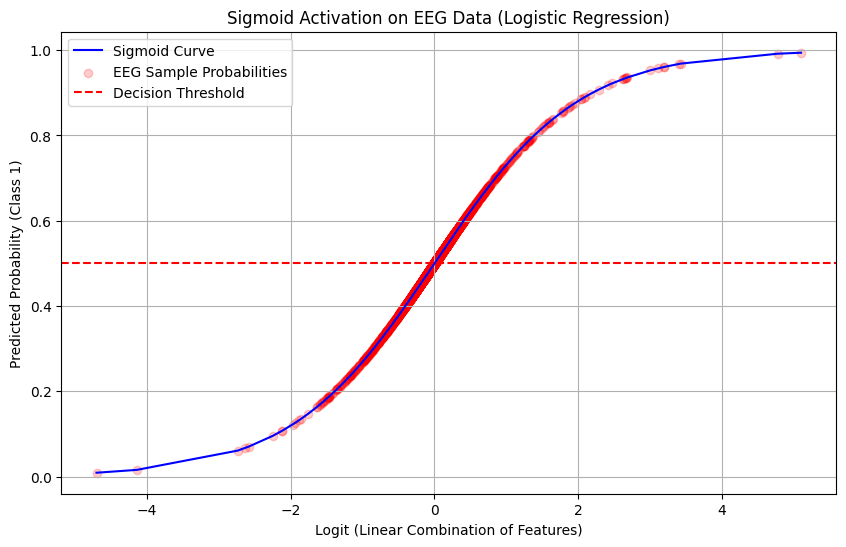

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# STEP 1: Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 2: Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# STEP 3: Get logits and probabilities
logits = X_test_scaled @ model.coef_.T + model.intercept_  # shape: (n_samples, 1)
logits = logits.flatten()
probs = 1 / (1 + np.exp(-logits))  # sigmoid function

# STEP 4: Sort logits for smooth sigmoid curve
sorted_indices = np.argsort(logits)
logits_sorted = logits[sorted_indices]
probs_sorted = probs[sorted_indices]

# STEP 5: Plot
plt.figure(figsize=(10, 6))
plt.plot(logits_sorted, probs_sorted, label="Sigmoid Curve", color='blue')
plt.scatter(logits, probs, alpha=0.2, label="EEG Sample Probabilities", color='red')
plt.axhline(0.5, color='red', linestyle='--', label="Decision Threshold")
plt.title("Sigmoid Activation on EEG Data (Logistic Regression)")
plt.xlabel("Logit (Linear Combination of Features)")
plt.ylabel("Predicted Probability (Class 1)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Naive Bayes

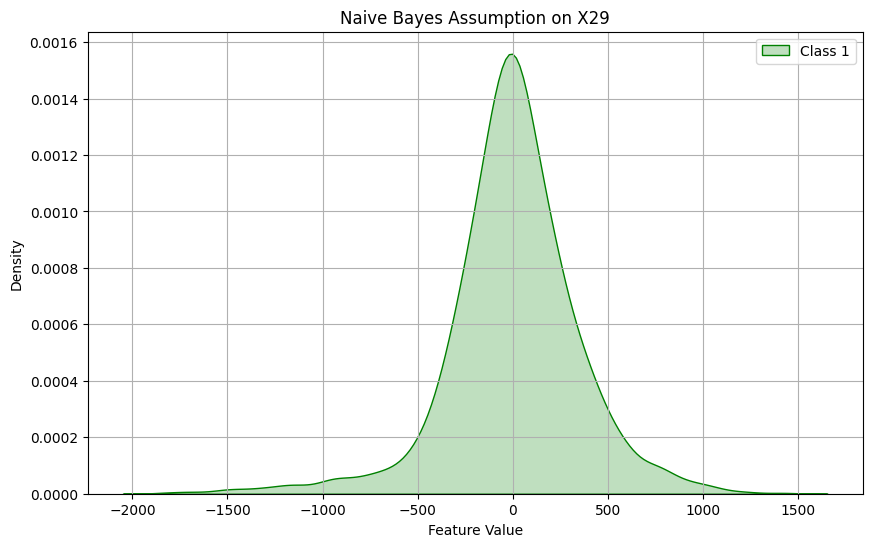

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature = "X29"

plt.figure(figsize=(10, 6))
sns.kdeplot(X_train[y_train == 0][feature], label="Class 0", fill=True, color='red')
sns.kdeplot(X_train[y_train == 1][feature], label="Class 1", fill=True, color='green')
plt.title(f"Naive Bayes Assumption on {feature}")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


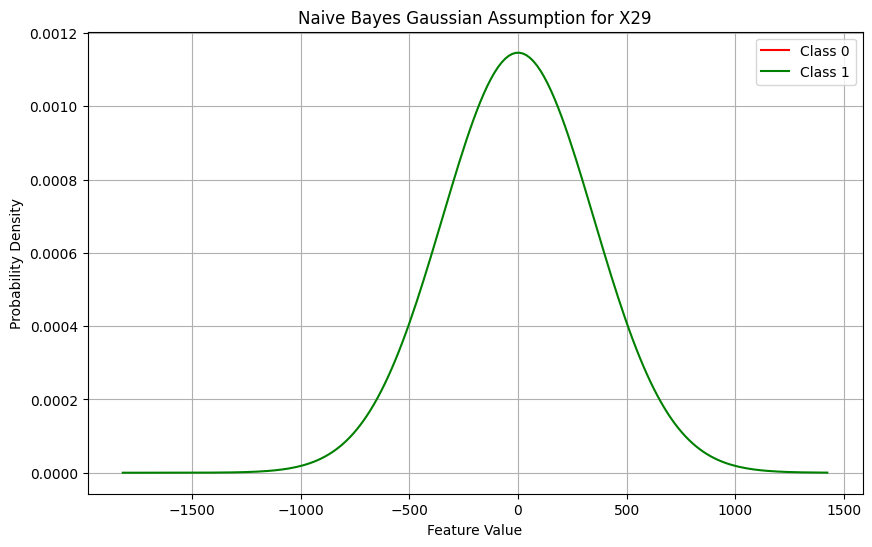

In [ ]:
from scipy.stats import norm
import numpy as np

# Feature values
x_vals = np.linspace(X_train[feature].min(), X_train[feature].max(), 200)

# Get class-specific means and std devs
mu_0 = X_train[y_train == 0][feature].mean()
std_0 = X_train[y_train == 0][feature].std()

mu_1 = X_train[y_train == 1][feature].mean()
std_1 = X_train[y_train == 1][feature].std()

# Plot Gaussian PDFs
plt.figure(figsize=(10, 6))
plt.plot(x_vals, norm.pdf(x_vals, mu_0, std_0), label='Class 0', color='red')
plt.plot(x_vals, norm.pdf(x_vals, mu_1, std_1), label='Class 1', color='green')
plt.title(f"Naive Bayes Gaussian Assumption for {feature}")
plt.xlabel("Feature Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


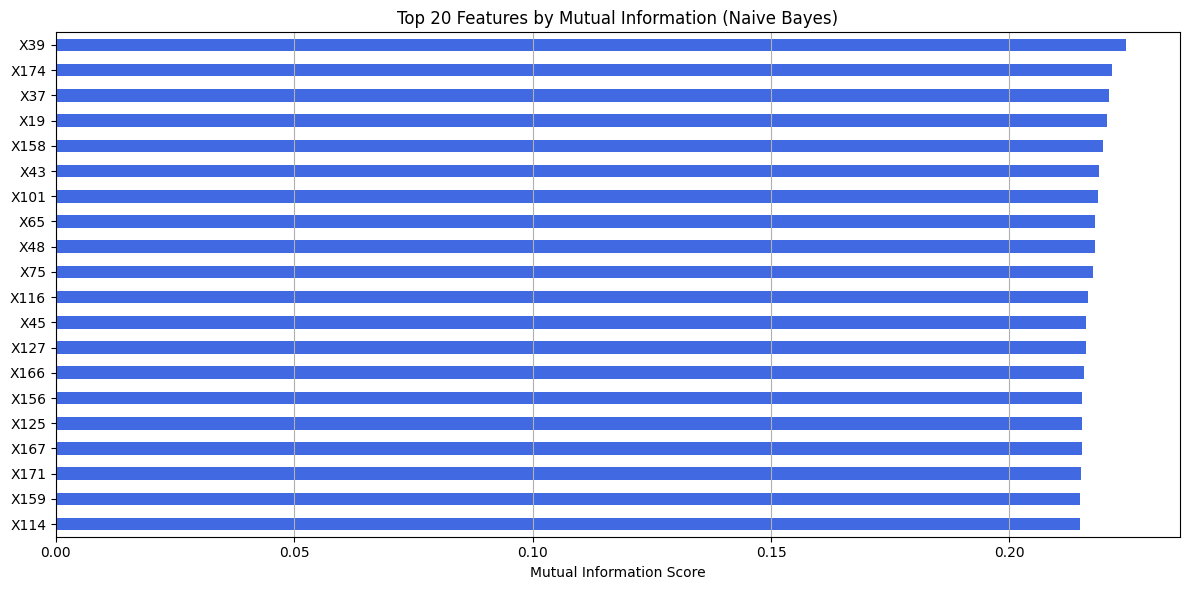

In [ ]:


from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mutual information
mi_scores = mutual_info_classif(X_train, y_train)
mi_series = pd.Series(mi_scores, index=X_train.columns)

# Sort and select top N features
top_n = 20
mi_top = mi_series.sort_values(ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 6))
mi_top.plot(kind='barh', color='royalblue')
plt.title(f"Top {top_n} Features by Mutual Information (Naive Bayes)")
plt.xlabel("Mutual Information Score")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier, export_text

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Display rules as text
from IPython.display import display, Markdown
tree_rules = export_text(dt, feature_names=df.columns[1:179].tolist())
display(Markdown(f"```\n{tree_rules}\n```"))


```
|--- X159 <= 145.50
|   |--- X159 <= -168.50
|   |   |--- X175 <= 45.50
|   |   |   |--- X144 <= 59.50
|   |   |   |   |--- X45 <= -120.50
|   |   |   |   |   |--- X144 <= 47.00
|   |   |   |   |   |   |--- X68 <= -339.00
|   |   |   |   |   |   |   |--- X41 <= -155.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- X41 >  -155.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X68 >  -339.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- X144 >  47.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- X45 >  -120.50
|   |   |   |   |   |--- X45 <= 63.50
|   |   |   |   |   |   |--- X166 <= -55.00
|   |   |   |   |   |   |   |--- X10 <= -139.00
|   |   |   |   |   |   |   |   |--- X115 <= 449.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X115 >  449.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- X10 >  -139.00
|   |   |   |   |   |   |   |   |--- X164 <= -174.00
|   |   |   |   |   |   |   |   |   |--- X174 <= -13.00
|   |   |   |   |   |   |   |   |   |   |--- X55 <= -159.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- X55 >  -159.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- X174 >  -13.00
|   |   |   |   |   |   |   |   |   |   |--- X68 <= -1.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- X68 >  -1.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- X164 >  -174.00
|   |   |   |   |   |   |   |   |   |--- X172 <= -70.50
|   |   |   |   |   |   |   |   |   |   |--- X97 <= 62.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |   |--- X97 >  62.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- X172 >  -70.50
|   |   |   |   |   |   |   |   |   |   |--- X160 <= -224.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- X160 >  -224.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |--- X166 >  -55.00
|   |   |   |   |   |   |   |--- X13 <= 13.50
|   |   |   |   |   |   |   |   |--- X107 <= 249.00
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- X107 >  249.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X13 >  13.50
|   |   |   |   |   |   |   |   |--- X43 <= -87.00
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- X43 >  -87.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- X45 >  63.50
|   |   |   |   |   |   |--- X46 <= 96.50
|   |   |   |   |   |   |   |--- X134 <= -92.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- X134 >  -92.50
|   |   |   |   |   |   |   |   |--- X68 <= -211.50
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- X68 >  -211.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X46 >  96.50
|   |   |   |   |   |   |   |--- X144 <= 40.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X144 >  40.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |--- X144 >  59.50
|   |   |   |   |--- X10 <= -575.00
|   |   |   |   |   |--- X48 <= -145.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- X48 >  -145.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- X10 >  -575.00
|   |   |   |   |   |--- X159 <= -185.00
|   |   |   |   |   |   |--- X94 <= -714.50
|   |   |   |   |   |   |   |--- X120 <= 113.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X120 >  113.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- X94 >  -714.50
|   |   |   |   |   |   |   |--- X159 <= -221.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X159 >  -221.50
|   |   |   |   |   |   |   |   |--- X159 <= -214.50
|   |   |   |   |   |   |   |   |   |--- X144 <= 669.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- X144 >  669.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X159 >  -214.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- X159 >  -185.00
|   |   |   |   |   |   |--- X108 <= 14.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X108 >  14.00
|   |   |   |   |   |   |   |--- X115 <= 22.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- X115 >  22.50
|   |   |   |   |   |   |   |   |--- X33 <= 267.00
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- X33 >  267.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |--- X175 >  45.50
|   |   |   |--- X17 <= 939.50
|   |   |   |   |--- X159 <= -172.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- X159 >  -172.50
|   |   |   |   |   |--- X99 <= 64.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- X99 >  64.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- X17 >  939.50
|   |   |   |   |--- class: 2
|   |--- X159 >  -168.50
|   |   |--- X31 <= 138.50
|   |   |   |--- X31 <= -166.50
|   |   |   |   |--- X18 <= 5.00
|   |   |   |   |   |--- X61 <= 29.50
|   |   |   |   |   |   |--- X23 <= -36.00
|   |   |   |   |   |   |   |--- X43 <= -39.50
|   |   |   |   |   |   |   |   |--- X52 <= -91.00
|   |   |   |   |   |   |   |   |   |--- X86 <= 60.50
|   |   |   |   |   |   |   |   |   |   |--- X161 <= 74.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- X161 >  74.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- X86 >  60.50
|   |   |   |   |   |   |   |   |   |   |--- X89 <= 178.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |   |--- X89 >  178.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X52 >  -91.00
|   |   |   |   |   |   |   |   |   |--- X158 <= -116.00
|   |   |   |   |   |   |   |   |   |   |--- X136 <= -140.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- X136 >  -140.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- X158 >  -116.00
|   |   |   |   |   |   |   |   |   |   |--- X14 <= -177.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- X14 >  -177.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- X43 >  -39.50
|   |   |   |   |   |   |   |   |--- X22 <= -66.50
|   |   |   |   |   |   |   |   |   |--- X132 <= 598.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X132 >  598.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- X22 >  -66.50
|   |   |   |   |   |   |   |   |   |--- X86 <= -35.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- X86 >  -35.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- X23 >  -36.00
|   |   |   |   |   |   |   |--- X38 <= -76.50
|   |   |   |   |   |   |   |   |--- X23 <= -12.50
|   |   |   |   |   |   |   |   |   |--- X159 <= -80.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- X159 >  -80.50
|   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- X23 >  -12.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X38 >  -76.50
|   |   |   |   |   |   |   |   |--- X106 <= 73.00
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- X106 >  73.00
|   |   |   |   |   |   |   |   |   |--- X17 <= 14.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X17 >  14.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- X61 >  29.50
|   |   |   |   |   |   |--- X39 <= -705.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- X39 >  -705.00
|   |   |   |   |   |   |   |--- X29 <= -178.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X29 >  -178.50
|   |   |   |   |   |   |   |   |--- X145 <= 13.50
|   |   |   |   |   |   |   |   |   |--- X91 <= -49.50
|   |   |   |   |   |   |   |   |   |   |--- X76 <= -108.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- X76 >  -108.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |   |--- X91 >  -49.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- X145 >  13.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- X18 >  5.00
|   |   |   |   |   |--- X17 <= -52.00
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- X17 >  -52.00
|   |   |   |   |   |   |--- X17 <= 40.50
|   |   |   |   |   |   |   |--- X58 <= 5.00
|   |   |   |   |   |   |   |   |--- X15 <= 37.50
|   |   |   |   |   |   |   |   |   |--- X17 <= 35.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X17 >  35.00
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- X15 >  37.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- X58 >  5.00
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- X17 >  40.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- X31 >  -166.50
|   |   |   |   |--- X107 <= 188.50
|   |   |   |   |   |--- X106 <= -168.50
|   |   |   |   |   |   |--- X44 <= -16.50
|   |   |   |   |   |   |   |--- X113 <= -65.00
|   |   |   |   |   |   |   |   |--- X15 <= -12.00
|   |   |   |   |   |   |   |   |   |--- X155 <= 130.00
|   |   |   |   |   |   |   |   |   |   |--- X113 <= -93.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- X113 >  -93.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |--- X155 >  130.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X15 >  -12.00
|   |   |   |   |   |   |   |   |   |--- X47 <= -136.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X47 >  -136.50
|   |   |   |   |   |   |   |   |   |   |--- X92 <= -79.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- X92 >  -79.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- X113 >  -65.00
|   |   |   |   |   |   |   |   |--- X139 <= -29.50
|   |   |   |   |   |   |   |   |   |--- X174 <= -153.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X174 >  -153.50
|   |   |   |   |   |   |   |   |   |   |--- X35 <= -168.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- X35 >  -168.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- X139 >  -29.50
|   |   |   |   |   |   |   |   |   |--- X171 <= -219.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- X171 >  -219.50
|   |   |   |   |   |   |   |   |   |   |--- X96 <= -70.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- X96 >  -70.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X44 >  -16.50
|   |   |   |   |   |   |   |--- X95 <= -13.00
|   |   |   |   |   |   |   |   |--- X104 <= -206.00
|   |   |   |   |   |   |   |   |   |--- X69 <= 457.00
|   |   |   |   |   |   |   |   |   |   |--- X43 <= -26.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |   |--- X43 >  -26.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X69 >  457.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- X104 >  -206.00
|   |   |   |   |   |   |   |   |   |--- X107 <= -181.50
|   |   |   |   |   |   |   |   |   |   |--- X97 <= -85.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- X97 >  -85.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- X107 >  -181.50
|   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- X95 >  -13.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- X106 >  -168.50
|   |   |   |   |   |   |--- X154 <= -95.50
|   |   |   |   |   |   |   |--- X159 <= -66.50
|   |   |   |   |   |   |   |   |--- X155 <= -225.00
|   |   |   |   |   |   |   |   |   |--- X160 <= 11.00
|   |   |   |   |   |   |   |   |   |   |--- X30 <= -179.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- X30 >  -179.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X160 >  11.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- X155 >  -225.00
|   |   |   |   |   |   |   |   |   |--- X37 <= -78.50
|   |   |   |   |   |   |   |   |   |   |--- X105 <= -10.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- X105 >  -10.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- X37 >  -78.50
|   |   |   |   |   |   |   |   |   |   |--- X151 <= -47.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- X151 >  -47.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |--- X159 >  -66.50
|   |   |   |   |   |   |   |   |--- X152 <= -283.50
|   |   |   |   |   |   |   |   |   |--- X130 <= -155.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- X130 >  -155.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X152 >  -283.50
|   |   |   |   |   |   |   |   |   |--- X146 <= -56.50
|   |   |   |   |   |   |   |   |   |   |--- X154 <= -154.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- X154 >  -154.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- X146 >  -56.50
|   |   |   |   |   |   |   |   |   |   |--- X137 <= 69.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- X137 >  69.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X154 >  -95.50
|   |   |   |   |   |   |   |--- X148 <= -107.50
|   |   |   |   |   |   |   |   |--- X141 <= -46.50
|   |   |   |   |   |   |   |   |   |--- X161 <= -89.50
|   |   |   |   |   |   |   |   |   |   |--- X119 <= 37.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- X119 >  37.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X161 >  -89.50
|   |   |   |   |   |   |   |   |   |   |--- X133 <= 107.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- X133 >  107.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X141 >  -46.50
|   |   |   |   |   |   |   |   |   |--- X133 <= 48.00
|   |   |   |   |   |   |   |   |   |   |--- X70 <= 128.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- X70 >  128.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- X133 >  48.00
|   |   |   |   |   |   |   |   |   |   |--- X144 <= -3.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- X144 >  -3.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X148 >  -107.50
|   |   |   |   |   |   |   |   |--- X159 <= -101.50
|   |   |   |   |   |   |   |   |   |--- X163 <= -83.00
|   |   |   |   |   |   |   |   |   |   |--- X150 <= 63.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- X150 >  63.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- X163 >  -83.00
|   |   |   |   |   |   |   |   |   |   |--- X144 <= -18.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- X144 >  -18.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |--- X159 >  -101.50
|   |   |   |   |   |   |   |   |   |--- X85 <= -100.50
|   |   |   |   |   |   |   |   |   |   |--- X91 <= -45.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- X91 >  -45.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- X85 >  -100.50
|   |   |   |   |   |   |   |   |   |   |--- X116 <= 62.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 39
|   |   |   |   |   |   |   |   |   |   |--- X116 >  62.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |--- X107 >  188.50
|   |   |   |   |   |--- X107 <= 281.00
|   |   |   |   |   |   |--- X88 <= -93.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X88 >  -93.50
|   |   |   |   |   |   |   |--- X99 <= -12.50
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- X99 >  -12.50
|   |   |   |   |   |   |   |   |--- X24 <= -88.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X24 >  -88.50
|   |   |   |   |   |   |   |   |   |--- X68 <= -103.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X68 >  -103.00
|   |   |   |   |   |   |   |   |   |   |--- X36 <= 8.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- X36 >  8.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- X107 >  281.00
|   |   |   |   |   |   |--- X100 <= 523.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X100 >  523.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |--- X31 >  138.50
|   |   |   |--- X32 <= 225.50
|   |   |   |   |--- X15 <= -63.50
|   |   |   |   |   |--- X87 <= -174.50
|   |   |   |   |   |   |--- X83 <= -232.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X83 >  -232.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- X87 >  -174.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- X15 >  -63.50
|   |   |   |   |   |--- X37 <= 38.50
|   |   |   |   |   |   |--- X24 <= 19.00
|   |   |   |   |   |   |   |--- X45 <= 138.50
|   |   |   |   |   |   |   |   |--- X122 <= -250.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X122 >  -250.00
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- X45 >  138.50
|   |   |   |   |   |   |   |   |--- X37 <= -54.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X37 >  -54.00
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- X24 >  19.00
|   |   |   |   |   |   |   |--- X48 <= 48.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X48 >  48.50
|   |   |   |   |   |   |   |   |--- X113 <= 250.50
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- X113 >  250.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- X37 >  38.50
|   |   |   |   |   |   |--- X132 <= 134.00
|   |   |   |   |   |   |   |--- X129 <= -173.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X129 >  -173.00
|   |   |   |   |   |   |   |   |--- X70 <= -43.50
|   |   |   |   |   |   |   |   |   |--- X98 <= -182.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |--- X98 >  -182.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- X70 >  -43.50
|   |   |   |   |   |   |   |   |   |--- X33 <= 190.50
|   |   |   |   |   |   |   |   |   |   |--- X112 <= 22.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- X112 >  22.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- X33 >  190.50
|   |   |   |   |   |   |   |   |   |   |--- X101 <= 79.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- X101 >  79.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- X132 >  134.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- X32 >  225.50
|   |   |   |   |--- X159 <= 143.50
|   |   |   |   |   |--- X17 <= 530.00
|   |   |   |   |   |   |--- X30 <= -30.00
|   |   |   |   |   |   |   |--- X29 <= -254.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X29 >  -254.00
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- X30 >  -30.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- X17 >  530.00
|   |   |   |   |   |   |--- X72 <= -171.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- X72 >  -171.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- X159 >  143.50
|   |   |   |   |   |--- class: 2
|--- X159 >  145.50
|   |--- X142 <= -91.50
|   |   |--- X144 <= 67.00
|   |   |   |--- X24 <= -413.00
|   |   |   |   |--- X24 <= -420.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- X24 >  -420.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- X24 >  -413.00
|   |   |   |   |--- class: 1
|   |   |--- X144 >  67.00
|   |   |   |--- X6 <= -144.50
|   |   |   |   |--- class: 2
|   |   |   |--- X6 >  -144.50
|   |   |   |   |--- class: 1
|   |--- X142 >  -91.50
|   |   |--- X172 <= -135.50
|   |   |   |--- class: 1
|   |   |--- X172 >  -135.50
|   |   |   |--- X105 <= 116.50
|   |   |   |   |--- X107 <= -161.50
|   |   |   |   |   |--- X13 <= 1023.50
|   |   |   |   |   |   |--- X166 <= 537.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X166 >  537.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- X13 >  1023.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- X107 >  -161.50
|   |   |   |   |   |--- X6 <= 108.50
|   |   |   |   |   |   |--- X165 <= -1.50
|   |   |   |   |   |   |   |--- X155 <= 71.50
|   |   |   |   |   |   |   |   |--- X171 <= -100.50
|   |   |   |   |   |   |   |   |   |--- X33 <= 847.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- X33 >  847.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X171 >  -100.50
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- X155 >  71.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- X165 >  -1.50
|   |   |   |   |   |   |   |--- X149 <= -16.50
|   |   |   |   |   |   |   |   |--- X8 <= -37.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- X8 >  -37.00
|   |   |   |   |   |   |   |   |   |--- X134 <= 28.50
|   |   |   |   |   |   |   |   |   |   |--- X94 <= -69.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- X94 >  -69.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X134 >  28.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- X149 >  -16.50
|   |   |   |   |   |   |   |   |--- X91 <= -180.00
|   |   |   |   |   |   |   |   |   |--- X32 <= 527.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- X32 >  527.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- X91 >  -180.00
|   |   |   |   |   |   |   |   |   |--- X7 <= 13.50
|   |   |   |   |   |   |   |   |   |   |--- X98 <= 135.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- X98 >  135.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |   |--- X7 >  13.50
|   |   |   |   |   |   |   |   |   |   |--- X97 <= -48.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |   |--- X97 >  -48.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |--- X6 >  108.50
|   |   |   |   |   |   |--- X132 <= -185.00
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- X132 >  -185.00
|   |   |   |   |   |   |   |--- X88 <= -31.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- X88 >  -31.50
|   |   |   |   |   |   |   |   |--- X87 <= 48.00
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- X87 >  48.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- X105 >  116.50
|   |   |   |   |--- X135 <= 578.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- X135 >  578.50
|   |   |   |   |   |--- X1 <= -603.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- X1 >  -603.00
|   |   |   |   |   |   |--- class: 2

```

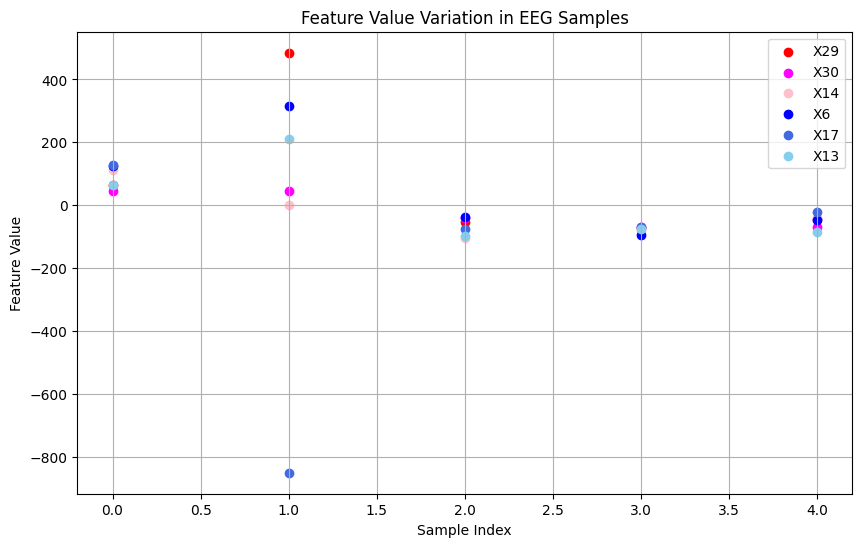

In [ ]:
import matplotlib.pyplot as plt

# Define features and values
features = ["X29", "X30", "X14", "X6", "X17", "X13"]
x = range(5)  # since each feature has 5 values

x_13 = [64, 212, -96, -74, -84]
x_17 = [127, -850, -75, -68, -21]
x_6 = [125, 315, -36, -95, -48]
x_29 = [64, 485, -54, -72, -43]
x_30 = [46, 44, -40, -68, -68]
x_14 = [113, 2, -104, -80, -43]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, x_29, color="red", label="X29")
plt.scatter(x, x_30, color="magenta", label="X30")
plt.scatter(x, x_14, color="pink", label="X14")
plt.scatter(x, x_6, color="blue", label="X6")
plt.scatter(x, x_17, color="royalblue", label="X17")
plt.scatter(x, x_13, color="skyblue", label="X13")

plt.title("Feature Value Variation in EEG Samples")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
# Naive Bayes

In [14]:
# Keep only numeric columns (drop strings, categories, etc.)
X_train_numeric = X_train.select_dtypes(include=[np.number])


📘 Knowledge Table (Seizure vs Non-Seizure):
    Feature       Mean      Variance
100    X101  -7.680326  31157.978567
101    X102  -7.205870  30722.190247
99     X100  -7.450000  30109.424611
102    X103  -7.012500  30022.083875
81      X82 -11.090978  29938.683863
159    X160  -5.267065  29597.427201
160    X161  -6.297500  29580.338161
171    X172 -12.883370  29323.019443
149    X150  -6.783696  29225.325096
80      X81 -10.023696  29183.267837


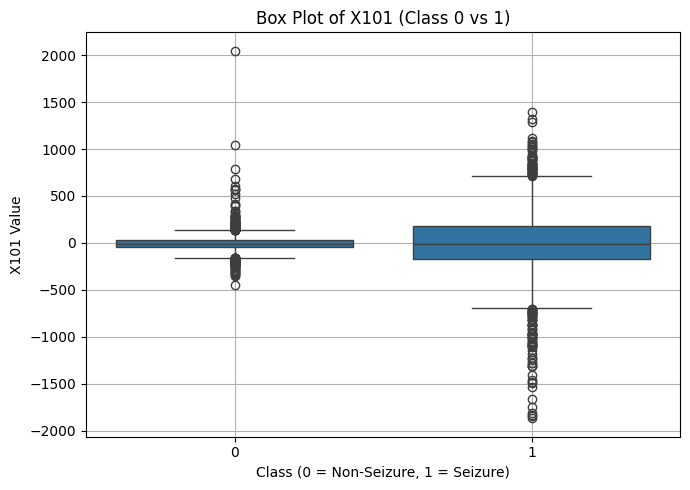

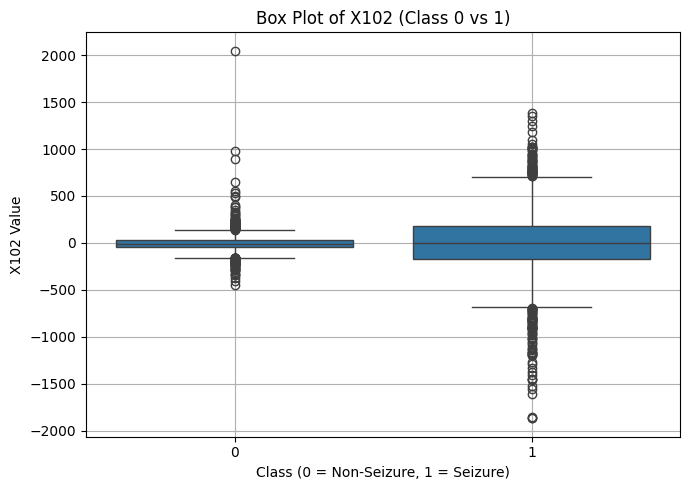

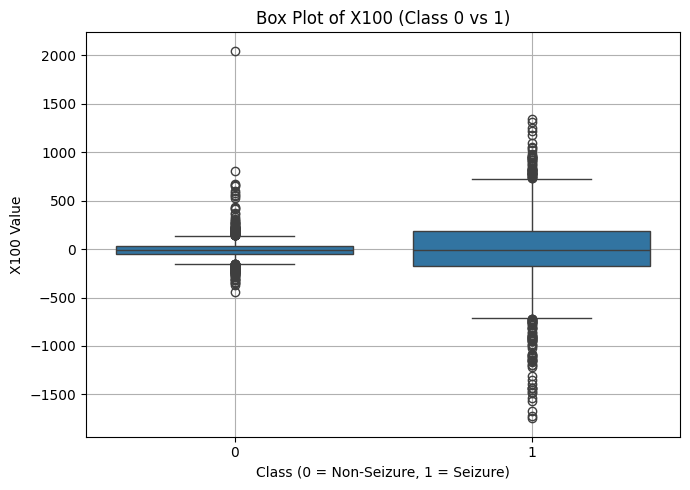

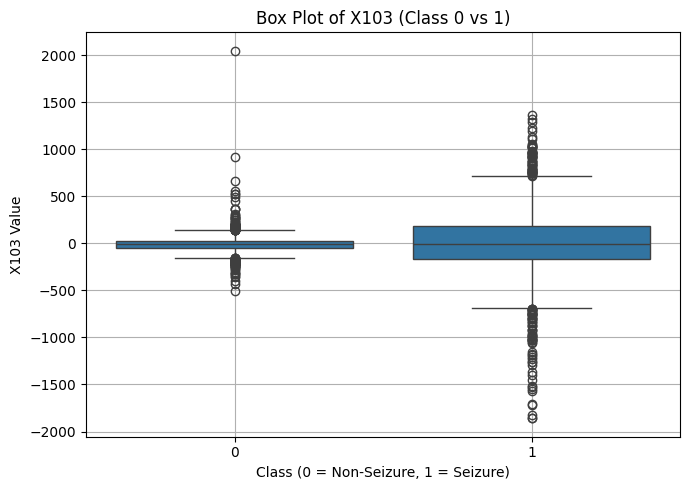

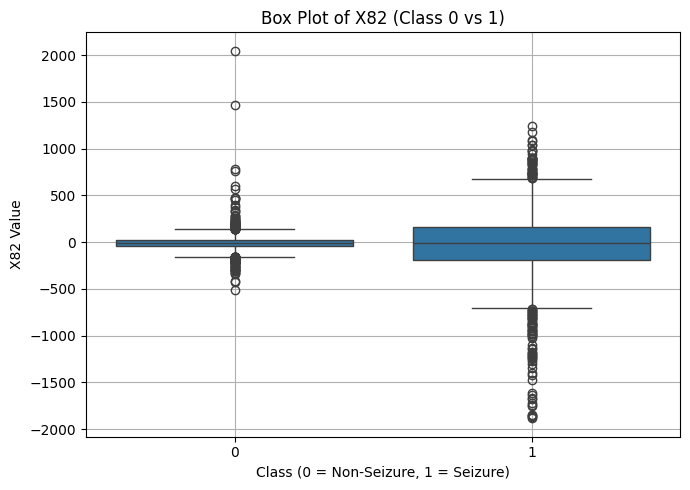

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Convert y_train and y_test to binary (1 = seizure, 0 = non-seizure)
# Same logic as in your df['y'] line
y_train_bin = y_train.apply(lambda x: 1 if x == 1 else 0)
y_test_bin = y_test.apply(lambda x: 1 if x == 1 else 0)

# Step 2: Select only numeric columns (in case any non-numeric slipped in)
X_train_numeric = X_train.select_dtypes(include=[np.number])

# Step 3: Compute variance and mean
variance = X_train_numeric.var()
means = X_train_numeric.mean()

# Step 4: Create Knowledge Representation Table
knowledge_table = pd.DataFrame({
    'Feature': X_train_numeric.columns,
    'Mean': means.values,
    'Variance': variance.values
}).sort_values(by='Variance', ascending=False)

print("📘 Knowledge Table (Seizure vs Non-Seizure):")
print(knowledge_table.head(10))

# Step 5: Plot box plots for top N features
top_n = 5
top_features = knowledge_table['Feature'].head(top_n).values

for feature in top_features:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=y_train_bin, y=X_train_numeric[feature])
    plt.title(f'Box Plot of {feature} (Class 0 vs 1)')
    plt.xlabel('Class (0 = Non-Seizure, 1 = Seizure)')
    plt.ylabel(f'{feature} Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
